# Lab03: Linear Regression.

- Student ID: 20126041
- Student name: Nguyen Huynh Man

**How to do your homework**


You will work directly on this notebook; the word `TODO` indicate the parts you need to do.

You can discuss ideas with classmates as well as finding information from the internet, book, etc...; but *this homework must be your*.

**How to submit your homework**

Before submitting, rerun the notebook (`Kernel` ->` Restart & Run All`).

Rename your notebook with `ID.ipynb` (for example, if your ID is 1234567, rename your notebook with `1234567.ipynb`) and submit it on moodle.

**Contents:**

- Linear Regression.

### 1. The hypothesis set

- Linear regression is a **linear** model, e.g. a model that assumes a linear relationship between the input variables (x) and the single output variable (y). More specifically, that y can be calculated from a linear combination of the input variables (x).
- Generally, a linear model will make predictions by calculating a weighted sum of the input features (independent variables). 

$$ \hat{y}=w_0+w_1x_1+w_2x_2+...+w_nx_n $$

- Notations:
    - $\hat{y}$ is the predicted value.
    - $n$ is the number of features.
    - $x_i$ is the $i^{th}$ feature value.
    - $w_j$ is the $j^{th}$ model parameter (including the bias term $w_0$ and the feature weights $w_1,w_2,...w_n$).

- You can re-write in form of matrix:

$$\hat{y}=h_{\mathbf{w}}\left(\mathbf{x}\right)=\mathbf{w}^{T}\cdot\mathbf{x}$$

- Notations:
    - $\mathbf{w}$ is the model **parameter vector** (including the bias term $w_0$ and the feature weights $w_1,w_2,...w_n$).
    - $\mathbf{w}^T$ is a transpose  of $\mathbf{w}$ (a row vector insteade of column vector).
    - $\mathbf{x}$ is the instance's **feature vector**, *containing* $x_0$ to $x_n$, with $x_0$ *always equal to* 1.
    - $\mathbf{w}^{T}\cdot\mathbf{x}$ is the dot product of $\mathbf{w}^T$ and $\mathbf{x}$.
    - $h_{\mathbf{w}}$ is the hypothesis function, using the parameters $\mathbf{w}$.
![Bias](Bias.png)

### 2. Performance measure and the learning goal

- Before we start to train the model, we need to determine how good the model fits the training data. There are a couple of ways to determine the level of quality, but we are going to use the most popular one and that is the **MSE** (Mean Square Error). We need to find the value for $\mathbf{w}$ that will minimize the MSE:
$$\mathbf{w}=\arg\min MSE_{\mathcal{D}_{train}}$$


- MSE on the train set $\mathcal{D}_{train}$ denoted as $\left(\mathbf{X},\mathbf{y}\right)$ including m samples $\left\{\left(\mathbf{x}_1,y_1\right),\left(\mathbf{x}_2,y_2\right),...\left(\mathbf{x}_m,y_m\right)\right\}$

$$MSE\left(X,h_{\mathbf{w}}\right)=\dfrac{1}{m}\sum_{i=1}^{m}\left(\mathbf{w}^T\cdot\mathbf{x}_i - y_i\right )^2$$
$$MSE\left(X,h_{\mathbf{w}}\right)=\dfrac{1}{m}\Vert\mathbf{X}\mathbf{w}-\mathbf{y}\Vert^2$$

Example below is a plot of an MSE function where the true target value is 100, and the predicted values range between -10,000 to 10,000. The MSE loss (Y-axis) reaches its minimum value at prediction (X-axis) = 100. The range is 0 to ∞.

![Plot of MSE Loss (Y-axis) vs. Predictions (X-axis)](MSE.png)

- To find the value of $\mathbf{w}$ that minimizes the MSE cost function, the most common way (*we have known since high school*) is to solve the derivative (gradient) equation. 
$$\mathbf{\hat{w}}=\left(\mathbf{X}^T  \mathbf{X}\right)^{\dagger}  \mathbf{X}^T  \mathbf{y}$$
  - $\mathbf{\hat{w}}$ is the value of $\mathbf{w}$ that minimizes the cost function
  - **Notice that** $\mathbf{X}^T  \mathbf{X}$ is not always invertible. $\left(\mathbf{X}^T  \mathbf{X}\right)^{\dagger}$ is pseudo-inverse of $\left(\mathbf{X}^T \mathbf{X}\right)$ - a general case of inverse when the matrix is not invertible or not even square.

### 3. Implementation 

#### Import Library

In [1]:
import numpy as np
import matplotlib.pyplot as plt 
import sklearn.datasets as datasets
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
%matplotlib inline

#### Create data

In [2]:
X,y=datasets.make_regression(n_samples=100,n_features=1, noise=5)

#### Load and visualize data

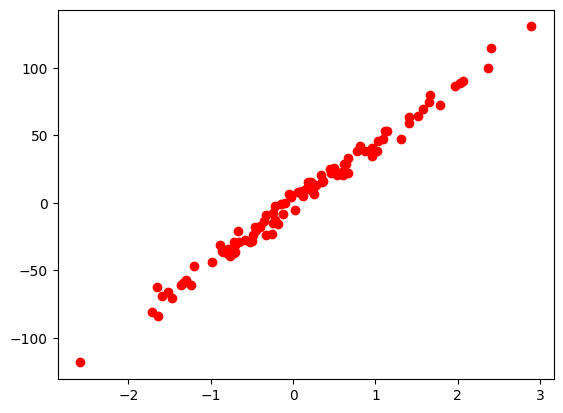

In [3]:
# Visualize data 

plt.plot(X, y, 'ro')
plt.show()

**TODO:** Your observation about data

My observation on the data: as you guys can see, the graph above, as our data visualization showed. 

Since we used `datasets.make_regression` with the default parameters(`n_samples=100,n_features=1, noise=5`), the generated relationship is likely to be linear. This means that the realtionship between X and y can be approximated by a straight line.

The presence of noise (controlled by the `noise` parameter) suggests that the relationship is not perfectly deterministic. There is some random variation or error added to the data points, simulating real-world scenarios where perfect predictions are not possible.

...

#### Training function

In [4]:
def train_linear_regression(X, y):
    '''
    Trains Linear Regression on the dataset (X, y).
    
    Parameters
    ----------
    X : numpy array, shape (m, d + 1)
        The matrix of input vectors (each row corresponds to an input vector); 
        the first column of this matrix is all ones (corresponding to x_0).
    y : numpy array, shape (m, 1)
        The vector of outputs.
    
    Returns
    -------
    w : numpy array, shape (d + 1, 1)
        The vector of parameters of Linear Regression after training.
    '''
    # TODO
    
    # Convert X and y to pandas DataFrames
    X_df = pd.DataFrame(X, columns=['x0', 'X'])  # Assuming the first column is x_0
    y_df = pd.DataFrame(y, columns=['y'])

    # X_df = pd.DataFrame(X, columns=['X'])  # Assuming the first column is x_0
    # y_df = pd.DataFrame(y, columns=['y'])

    # Check if 'x0' column already exists before adding it
    if 'x0' not in X_df.columns:
        # Add a column of ones to the input DataFrame, if not do nothing
        X_df.insert(0, 'x0', 1)

    # Perform linear regression using pandas and numpy    
    
    X_transpose_X_inv = np.linalg.inv(X_df.T.dot(X_df))
    # Implement: X^T.X, which is the dot product of the transpose of X and X.
    w = X_transpose_X_inv.dot(X_df.T).dot(y_df)
    # Implement: X^T.y, which is the dot product of the transpose of X and y.

    

    # IMPLEMENT sklearn.linear_model and sklearn.model_selection libraries
    # X_train, X_test, y_train, y_test = train_test_split(X_df, y_df, test_size = 0.2, random_state = 42)
    # w = LinearRegression()
    # w.fit(X_train, y_train)
    # print("TRAIN: ", w)
    
    # print(X_df) 
    # print(y_df) 
    
    # w.fit(X_df,y_df)
    
    
    return w

In [5]:
# Construct one_added_X 
# TODO:
# First column of one_added_X is all ones (corresponding to x_0).
one_added_X = np.concatenate([np.ones((X.shape[0], 1)), X], axis=1)

# np.ones((X.shape[0], 1)): 
# This creates a column vector of ones with the same number of rows as X. This corresponds to the intercept term X0.

# np.concatenate([np.ones((X.shape[0], 1)), X], axis=1)
# This concatenates the column vector of ones and the original feature matrix along the columns (axis=1). The result is the design matrix one_added_X with the first column being all ones.
print ('one_added_X.shape =', one_added_X.shape)
print ('y.shape =', y.shape)

one_added_X.shape = (100, 2)
y.shape = (100,)


#### Train our model and visualize result

(-2.8579542089714436, 3.163873536576656)

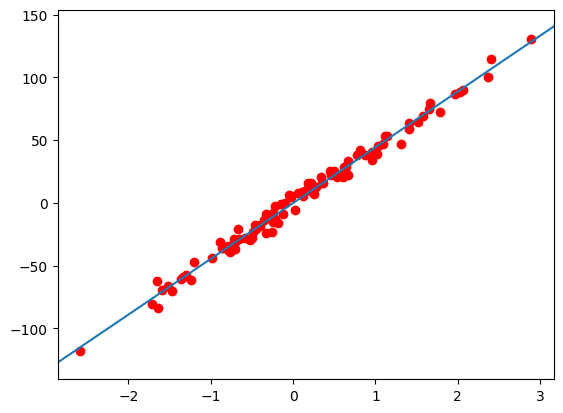

In [6]:
w = train_linear_regression(one_added_X, y)

# Visualize result
predicted_ys = one_added_X.dot(w)

# IMPLEMENT sklearn.linear_model library
# predicted_ys = w.predict(one_added_X)

plt.plot(X,y,'ro')
# print (w)
# score = w.predict([[9.5]])
# print(score)

x_min, x_max = plt.xlim()
xs = np.array([x_min, x_max]).reshape(-1, 1)

# Construct one_added_xs 
# TODO:
# First column of one_added_xs is all ones (corresponding to x_0).
# print (xs)
first_one = np.ones((xs.shape[0], 1))
ones_added_xs = np.concatenate((first_one, xs), axis=1)

predicted_ys = ones_added_xs.dot(w)

# IMPLEMENT sklearn.linear_model library
# predicted_ys = w.predict(ones_added_xs)

plt.plot(xs, predicted_ys)
plt.xlim(x_min, x_max)

**TODO**: Discuss about advantages and disadvantages of `Linear Regression`:

## Advantages:
- Simple to implement, good interpret and efficient to train

- Linear regression tends to have a lower risk of **over-fitting** than **under-fitting**, particularly when compared to more complex models. In order to achieve that, we have to use some methods to prevend **over-fitting** in `Linear Regression` such as: Feature Selection, Regularization, Cross-Validation, Data Splitting, Feature Scaling, ...

- `Linear Regression models` are generally easier to train compared to more complex models. Several factors contribute to this ease of training: Closed-Form Solution, Gradient Descent, Low Computational Complexity, Ease of Interpretation,... However, it's important to note that the simplicity of linear regression comes with trade-offs. Linear regression may not perform well when the relationship between features and the target variable is highly nonlinear or when there are complex interactions between features. That why we need to use some methods above to addressing these issue. But the choice of models still heavily depends on the characteristics of the data and the goals of the modeling task.

- It has a considerably lower complexity when compared to other machine learning algorithms: `k-Nearest Neighbors(k-NN)` - Moderate Complexity, `Support Vector Machines(SVM)` - Higher Complexity, `Recurrent Neural Networks(RNNs) and Long Short-Term Memory(LSTM)` - Very High Complexity, ...

## Disadvantages:
- Outliers and noise can have considerable effects on the regression that can lead to models with low accuracy.

- It can't implement on complicated model because it it assumes a linear relationship between the input and output variables, so it fails to fit complex datasets properly. In real life, the realationship between the variables of the dataset isn't always linear and hence a straight line doesn't fit the data properly without using some methods for data cleaning so that it can fit the model well.

- Linear regression assumes that the data is independent, so very often the inputs aren't independent of each other.

- Sensitive with noise, multicollinearity data and insufficient cbservations, so we have to remove it before using linear regression and if the number of observations are lesser than the number of features, we should use other algorithms instead of linear regression.

- It's important to note that linear regression has its strengths but is not a one-size-fits-all solution. Understanding the assumptions and limitations is crucial for selecting the appropriate model for a given dataset. In situations where linear regression's assumptions are violated, or when dealing with complex relationships, other machine learning algorithms or advanced regression techniques may be considered. Regularization methods like Lasso or Ridge regression can also help address multicollinearity and prevent overfitting.
...

**BONUS**: Discuss about advantages and disadvantages of the way i use to implement `Linear Regression`


## Approach 1 (Numpy and Pandas):
### Advantages:
- Transparency and Control: Provides explicit control over the implementation, making it suitable for learning purposes or when fine-tuning specific aspects of the regression process.
- Flexibility: Allows for easy customization or modification of the linear regression algorithm based on specific requirements.
- Understanding: Helps users gain a deeper understanding of the mathematical concepts involved in linear regression.
### Disadvantages:
- Manual Implementation: Requires manual implementation of the closed-form solution, which can be time-consuming and error-prone.
- Not Optimized for Large Datasets: May not be as efficient for large datasets due to the direct calculation of the closed-form solution.
- Code Length: Involves writing more lines of code to achieve the same result compared to the higher-level abstraction in Approach 2.

## Approach 2 (Numpy, Pandas, sklearn.linear_model, and sklearn.model_selection):
### Advantages:
- Convenience: Utilizes the convenient LinearRegression class from sklearn, abstracting away the mathematical details and requiring less manual coding.
- Optimized Implementation: sklearn's implementation is well-optimized and may use more efficient algorithms, making it suitable for large datasets.
- Time Savings: Faster development and prototyping due to the higher level of abstraction and pre-implemented solutions.
### Disadvantages:
- Less Transparency: Offers less transparency into the mathematical details, which might be a disadvantage for those who want to understand every step of the process.
- Dependency on External Library: Requires the sklearn library, which may be a consideration if minimizing dependencies is essential.
- Limited Customization: Less flexibility for customizing the linear regression algorithm compared to Approach 1.

## Considerations:
- `Dataset Size`: For small to medium-sized datasets, both approaches can work well. For large datasets, Approach 2 may have an edge due to optimizations in sklearn.
- `Learning vs. Production`: Approach 1 is more suitable for learning and understanding the intricacies of linear regression, while Approach 2 is more convenient for production code and quick prototyping.
- `Code Maintenance`: Approach 2 may be easier to maintain, especially when updates or modifications are needed, due to the encapsulated functionality provided by sklearn.

In summary, the choice between the two approaches depends on the specific requirements of the task, the level of transparency desired, and the trade-off between control and convenience.